In [1]:
import pandas as pd
import os

In [21]:
folder_data = [i for i in os.listdir('/home/jupyter-an.karpov/shared/Res_Tree') if not i.startswith('.')]

In [22]:
# for i in folder_data:
#     if not i.startswith('.'):
#         print(i)

# [i for i in folder_data if not i.startswith('.')]

In [ ]:
# x = ['1', '2', 'start', '3', '4', 'end', '5', '6', 'start', '7', '8', 'end']
# scanning = False
# for i in x:
#     if i == 'end':
#         scanning = False
#         continue    
    
#     if scanning:
#         print(i)
    
    
#     if i == 'start':
#         scanning = True
#         continue

In [23]:
folder_data

['F000545', 'M000547', 'F000570']

In [70]:
p = '/home/jupyter-an.karpov/shared/Res_Tree/F000545/res_2019.09.11_0.0_6493B6_Container-dat_2125_91-105-165_F000545/meals_list_2.txt'
          
          

In [71]:
all_data = open(p).readlines()

In [93]:
all_data = []

In [94]:
scanning = False
for i in meal_data:
    if i.startswith('-------------'):
        scanning = False
        continue    
        
    if scanning:
        if 'Meal#;' in i:
            col_name = i
            continue
        all_data.append([value.strip() for value in i.split(';')])
        
    
    if 'Non-deleted saved meals' in i:
        scanning = True
        continue
        

In [95]:
final_col_names = [col.strip() for col in col_name.split(';')]

In [129]:
meal_df = pd.DataFrame(all_data, columns=final_col_names[0:17])

In [130]:
meal_df.head()

,Meal#,Date,Start,End,Flags,E-IN,Cbh,Fat,Pro,S. tstamp,End tstamp,Minutes,Recs,First,Last,Type,Frags
0,0,09.01.2020,10:54,12:33,0x84,247.41,18.85,13.58,12.45,1578556469,1578562439,100,100,1,100,F3-Meal,
1,1,09.01.2020,12:42,14:11,0x84,198.60,17.00,10.31,9.45,1578562921,1578568288,90,94,104,197,F3-Meal,
2,2,09.01.2020,14:31,16:41,0x84,320.71,23.09,18.03,16.53,1578569494,1578577272,130,130,217,346,F3-Meal,
3,3,09.01.2020,16:57,18:01,0x84,136.57,12.71,6.77,6.20,1578578237,1578582096,65,65,362,426,F3-Meal,
4,4,09.01.2020,18:09,19:46,0x84,193.10,16.25,10.11,9.27,1578582579,1578588367,97,97,434,530,F3-Meal,


In [131]:
meal_df = meal_df.astype({'Minutes': 'int', 'Pro': 'float'})

In [132]:
meal_df['Date'] = pd.to_datetime(meal_df.Date)

In [133]:
user_meal_df = meal_df[['Date', 'Pro', 'Minutes']]

In [142]:
df = user_meal_df.groupby('Date', as_index=False) \
    .agg({'Minutes': 'sum'})

In [143]:
df.to_csv('df_minutes.csv', index=False)

In [ ]:
/////дз

In [5]:
taxi = pd.read_csv('taxi_peru.csv',sep = ';',parse_dates=['start_at', 'end_at', 'arrived_at'])

In [14]:
taxi['a'] = taxi['arrived_at'] - taxi['start_at']

In [20]:
# taxi['a'] = taxi['a'].astype('timedelta64[m]')
taxi['wait_time'] = taxi['a'] 

In [22]:
a = ["asap","reserved"]

In [26]:
taxi.query("start_type == 'reserved' and wait_time > 0 and start_type in @a") \
    .groupby('driver_id') \
    .agg({'user_id': 'count'}).sort_values('user_id', ascending = False)

,user_id
driver_id,
406921adcca37705ef527b4246c0cfea,67
d665fb9f75ef5d9cd0fd89479380ba78,59
ec84a73745199ff840ecafcb924383ad,57
56f59b58bcbbd1cdabc3652e713134c2,51
c814db2127582cf95dea1f74f43127c2,45
...,...
d7bf644eb441cda6127f91addebb85c4,1
b68895736389f2949faa8c73555b81ac,1
8cb98e46b27af1e6fca8768a2a6329f3,1


In [29]:
taxi.query("driver_id == '406921adcca37705ef527b4246c0cfea' and wait_time > 0 and start_type in @a")

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,a,wait_time
9,9448070ece760ea5386e5d4822121a6c,dd23cf0ef33ae44e0c0b4c756e1fe4e8,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-11-22 23:42:00,"-12,08969627","-77,03574926",2010-11-23 00:53:00,...,"-77,03020982",drop off,"-12,0898203","-77,0358663",2010-11-23 00:05:00,Android,5.0,5.0,23.0,23.0
21,7abecd4f47c2c1d5390d86eb221babff,d0d21e2cc815fa276295ce3c51811d4e,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-04-26 21:42:00,"-12,0834957","-77,0493404",2010-04-26 21:59:00,...,"-77,041334",drop off,"-12,08911977","-77,03838321",2010-04-26 21:51:00,web,NaN,0.0,9.0,9.0
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,...,"-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,1.0,1.0
100,fdd0e7184d1ec5e7cba69b61ee4b94bc,fd4143bc419bb1b2a067467054474541,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-10-23 00:40:00,"-12,09078598","-77,00527954",2010-10-23 01:41:00,...,"-77,05307007",drop off,"-12,09218563","-77,02942289",2010-10-23 01:10:00,iPhone,NaN,5.0,30.0,30.0
116,edb98fb864c8f62392c4d85221242c22,f9960513c13c6a5a8ed5213fe386d103,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-01-27 04:29:00,"-12,75175476","-76,62265015",2010-01-27 05:13:00,...,"-76,60516357",drop off,"-12,7620922","-76,60016692",2010-01-27 04:45:00,iPhone,NaN,5.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22922,6e43c685763f6ddd26372fc4875fd237,274830ce12f90afc5e6000fa62d397e5,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-07-08 13:36:00,"-12,14373016","-77,00094604",2010-07-08 14:29:00,...,"-77,03695679",drop off,"-12,11725509","-76,98733343",2010-07-08 13:53:00,iPhone,5.0,5.0,17.0,17.0
22959,700fd335d8d7f44d35932db6a0e34877,2ca81f8112b8c60af222ee2ed7287d4e,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-11 14:05:00,"-12,105472","-77,018854",2010-12-11 14:40:00,...,"-77,0430556",rider cancel,"-12,10542956","-77,01880604",2010-12-11 14:08:00,web,NaN,NaN,3.0,3.0
22985,70ec7d3b1d9167f3ab4ac862d0c1d524,9a509746b5612ec4d3126dab574b9966,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-06-12 18:08:00,"-12,09736633","-77,00970459",2010-06-12 18:54:00,...,"-76,98703003",drop off,"-12,10031123","-77,03455957",2010-06-12 18:33:00,iPhone,4.0,5.0,25.0,25.0
23026,82a0c2c11dd794701e99e0e647e56dff,274830ce12f90afc5e6000fa62d397e5,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-06-07 22:41:00,"-12,097578","-77,038276",2010-06-07 23:37:00,...,"-58,4829712",drop off,"-12,09402276","-77,03317298",2010-06-07 22:56:00,web,NaN,5.0,15.0,15.0


In [30]:
taxi.query("driver_id == '406921adcca37705ef527b4246c0cfea' and wait_time <= 0 and start_type in @a")

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,a,wait_time
23,23be2836bd1f20bf05c9ffa3aa6db37c,410389a59b3c36fa86e76bce43d9a336,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-05-20 16:27:00,"-12,1099832","-76,975818",2010-05-20 17:16:00,...,"-77,0293897",drop off,"-12,098508","-76,99515788",2010-05-20 16:16:00,web,NaN,5.0,-11.0,-11.0
89,eeb07ac5409c082354b923689340c1ab,f80662a4bd846bf59ea5684db634805d,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-14 01:30:00,"-12,0194682","-77,1077685",2010-03-14 02:23:00,...,"-76,9769345",drop off,"-12,02777997","-77,10243216",2010-03-14 01:29:00,web,NaN,NaN,-1.0,-1.0
90,eeb07ac5409c082354b923689342bbe6,f80662a4bd846bf59ea5684db634805d,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-13 22:30:00,"-12,1079978","-76,9769345",2010-03-13 23:19:00,...,"-77,107768",drop off,"-12,1507137","-76,97930189",2010-03-13 22:22:00,web,NaN,5.0,-8.0,-8.0
91,124dc2dbc4f79130bfa0b9357799ae26,f80662a4bd846bf59ea5684db634805d,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-11 12:40:00,"-12,1079978","-76,9769345",2010-03-11 13:29:00,...,"-77,0255448",drop off,"-12,11042688","-76,9767086",2010-03-11 12:29:00,web,NaN,5.0,-11.0,-11.0
186,760cafde3f1d33ceca82940e523468ba,c21605b791b47423867a99d06f87358e,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-04-08 20:20:00,"-12,1171111","-77,0389639",2010-04-08 22:28:00,...,"-76,9774154",drop off,"-12,11018096","-77,01207995",2010-04-08 20:11:00,web,NaN,5.0,-9.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22926,6e43c685763f6ddd26372fc487c2a818,4c37542f88f6bc6fb2465a93be210506,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-07-08 13:05:00,"-12,1053583","-76,9757342",2010-07-08 13:20:00,...,"-76,965715",drop off,"-12,11080248","-76,97951691",2010-07-08 13:01:00,web,5.0,5.0,-4.0,-4.0
22941,6e82410a7a2444e1199e6adb2f5e3e15,59a766bd488db1053eeba5a3aea922df,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-06-24 23:03:00,"-12,08100149","-76,97670009",2010-06-24 23:28:00,...,"-76,94800448",drop off,"-12,09995831","-76,97940727",2010-06-24 22:55:00,Android,0.0,5.0,-8.0,-8.0
22952,700fd335d8d7f44d35932db6a09c7bc5,b44159c128d31f55629260b6716b58f7,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-12-11 23:45:00,"-12,09822845","-76,96697998",2010-12-12 00:16:00,...,"-76,99118042",drop off,"-12,09801868","-76,97260743",2010-12-11 23:33:00,iPhone,5.0,5.0,-12.0,-12.0
23008,71fb884c17b72d319a18331d3ee4c12d,3e201cdebc5a9c587d83d10ed24fddfb,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-05 14:06:00,"-12,105283","-77,018843",2010-12-05 14:06:00,...,"-77,0430556",drop off,0,0,2010-12-05 14:06:00,web,NaN,5.0,0.0,0.0


In [34]:
taxi['month'] = taxi['start_at'].dt.month

In [37]:
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

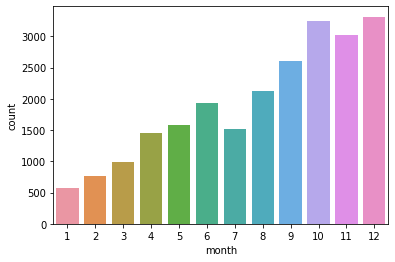

In [36]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
ax = sns.countplot(x="month", data=taxi)

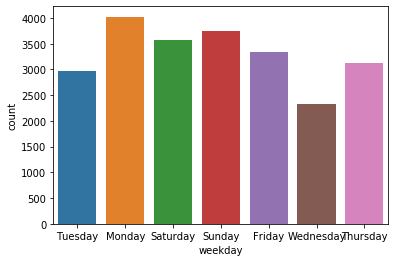

In [38]:
ax = sns.countplot(x="weekday", data=taxi)

In [43]:
taxi.groupby('month').agg({'user_id': lambda group: group.nunique()})

,user_id
month,
1,102
2,111
3,163
4,254
5,275
6,309
7,318
8,377
9,416


In [44]:
import os

In [54]:
os.listdir('data/')[1:]

['2020-12-06',
 '2020-12-08',
 '2020-12-09',
 '2020-12-07',
 '2020-12-05',
 '2020-12-03',
 '2020-12-04']

In [78]:
data_ = os.listdir('data')[1:]

In [106]:
data_2 = []
for i in range(len(data_)):
    data_2.append(set(os.listdir(str('data' + "/" + data_[i]))) - set(['.DS_Store']))

In [177]:
data_2

[{'Vasiliy_Fedorov'},
 {'Alexey_Fedorov',
  'Anton_Smirnov',
  'Kirill_Smirnov',
  'Petr_Petrov',
  'Rostislav_Petrov'},
 {'Alexey_Smirnov',
  'Anton_Ivanov',
  'Anton_Petrov',
  'Anton_Smirnov',
  'Petr_Fedorov',
  'Rostislav_Petrov',
  'Vasiliy_Ivanov'},
 {'Alexey_Fedorov',
  'Alexey_Ivanov',
  'Alexey_Smirnov',
  'Anton_Ivanov',
  'Anton_Smirnov',
  'Kirill_Fedorov',
  'Petr_Fedorov',
  'Petr_Smirnov',
  'Rostislav_Fedorov',
  'Vasiliy_Ivanov'},
 {'Alexey_Fedorov',
  'Alexey_Petrov',
  'Kirill_Smirnov',
  'Petr_Ivanov',
  'Petr_Smirnov',
  'Rostislav_Smirnov'},
 {'Alexey_Smirnov',
  'Anton_Petrov',
  'Kirill_Petrov',
  'Petr_Fedorov',
  'Vasiliy_Ivanov',
  'Vasiliy_Petrov'},
 {'Alexey_Smirnov',
  'Kirill_Fedorov',
  'Petr_Fedorov',
  'Petr_Ivanov',
  'Petr_Smirnov',
  'Rostislav_Fedorov',
  'Rostislav_Ivanov',
  'Rostislav_Smirnov',
  'Vasiliy_Ivanov'}]

In [154]:
data____=[]
for i in range(len(data_2)):
    for j in range(len(list(data_2[i]))):
        try:
            data_r = pd.read_csv(str('data' + "/" + data_[i] + "/"  + list(data_2[i])[j] + '/data.csv'), sep = ',')
            data____.append(data_r)
        except:
            continue

In [173]:
import numpy as np

In [217]:
data_1 = pd.concat(data____)

In [225]:
data_1

,Unnamed: 0,product_id,quantity
0,0,56,4
1,1,97,3
2,2,79,3
3,3,29,5
0,0,73,5
...,...,...,...
1,1,96,5
2,2,3,4
3,3,12,3
4,4,92,5


In [198]:
list(data_2[1])

['Alexey_Fedorov',
 'Rostislav_Petrov',
 'Anton_Smirnov',
 'Petr_Petrov',
 'Kirill_Smirnov']

In [226]:
alll = []
for i in range(len(data_)):
    for j in range(len(data_2[i])):
        alll.append(pd.DataFrame((data_[i], list(data_2[i])[j])).transpose())

In [228]:
np.concatenate([np.array(pd.concat(alll)), np.array(data_1)] ,axis = 0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 3

In [230]:
np.array(pd.concat(alll))

array([['2020-12-06', 'Vasiliy_Fedorov'],
       ['2020-12-08', 'Alexey_Fedorov'],
       ['2020-12-08', 'Rostislav_Petrov'],
       ['2020-12-08', 'Anton_Smirnov'],
       ['2020-12-08', 'Petr_Petrov'],
       ['2020-12-08', 'Kirill_Smirnov'],
       ['2020-12-09', 'Anton_Petrov'],
       ['2020-12-09', 'Rostislav_Petrov'],
       ['2020-12-09', 'Anton_Smirnov'],
       ['2020-12-09', 'Alexey_Smirnov'],
       ['2020-12-09', 'Anton_Ivanov'],
       ['2020-12-09', 'Petr_Fedorov'],
       ['2020-12-09', 'Vasiliy_Ivanov'],
       ['2020-12-07', 'Alexey_Fedorov'],
       ['2020-12-07', 'Anton_Smirnov'],
       ['2020-12-07', 'Alexey_Smirnov'],
       ['2020-12-07', 'Anton_Ivanov'],
       ['2020-12-07', 'Alexey_Ivanov'],
       ['2020-12-07', 'Petr_Fedorov'],
       ['2020-12-07', 'Vasiliy_Ivanov'],
       ['2020-12-07', 'Rostislav_Fedorov'],
       ['2020-12-07', 'Kirill_Fedorov'],
       ['2020-12-07', 'Petr_Smirnov'],
       ['2020-12-05', 'Alexey_Fedorov'],
       ['2020-12-05', 'Alex

In [224]:
len(np.array(data_1))

161